In [ ]:
!pip install -q python_igraph
!sudo apt install -q libcairo2-dev pkg-config python3-dev
!pip install -q pycairo

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.7 MB/s eta 0:00:00
Reading package lists...
Building dependency tree...
Reading state information...
pkg-config is already the newest version (0.29.1-0ubuntu4).
python3-dev is already the newest version (3.8.2-0ubuntu2).
python3-dev set to manually installed.
The following additional packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libffi-dev libglib2.0-dev
  libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev
  libsepol1-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev
  libglib2.0-dev libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev
  libselinux1-dev libsepol1-dev libxcb-render0-dev libxcb-shm0-de

In [ ]:
import igraph as ig
import pandas as pd
import numpy as np
import cairo
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

In [ ]:
flight_inf = pd.read_csv("drive/MyDrive/Colab Notebooks/CPT591final/336781026_T_T100D_SEGMENT_US_CARRIER_ONLY.csv",
                         usecols=['PASSENGERS', 'ORIGIN_STATE_ABR', 'DEST_STATE_ABR'])

In [ ]:
flight_inf

,PASSENGERS,ORIGIN_STATE_ABR,DEST_STATE_ABR
0,1,IN,NY
1,1,ME,MA
2,1,GA,FL
3,1,AK,AK
4,1,AK,AK
...,...,...,...
322538,83025,FL,GA
322539,83956,FL,GA
322540,85671,HI,HI
322541,85852,HI,HI


In [ ]:
not_state = ['VI','PR','MP','GU','AS','TT']
drop_index = list()
for abrr in not_state:
  index = flight_inf[(flight_inf.ORIGIN_STATE_ABR==abrr)|(flight_inf.DEST_STATE_ABR==abrr)].index.tolist()
  if len(index) != 0:
    #print(index)
    drop_index.extend(index)
drop_index = list(set(drop_index))
drop_index.sort()
#print(drop_index)
for abrr in list(short_state_names.values()):
  #print(abrr)
  index = flight_inf[(flight_inf.ORIGIN_STATE_ABR==abrr)&(flight_inf.DEST_STATE_ABR==abrr)].index.tolist()
  if len(index) != 0:
    #print(index)
    drop_index.extend(index)
drop_index.sort()
#print(drop_index)

In [ ]:
flight_inf = flight_inf.drop(flight_inf.index[drop_index])

In [ ]:
flight_inf

,PASSENGERS,ORIGIN_STATE_ABR,DEST_STATE_ABR
0,1,IN,NY
1,1,ME,MA
2,1,GA,FL
17,1,TN,VA
39,1,HI,NJ
...,...,...,...
322532,80320,FL,GA
322535,81045,FL,GA
322538,83025,FL,GA
322539,83956,FL,GA


In [ ]:
short_state_name_list = list(short_state_names.values())
store = list()
adjacency_matrix = np.zeros(shape=(len(short_state_name_list), len(short_state_name_list)), dtype=np.int64)
for i, ori_abbr in enumerate(short_state_name_list):
  for j, dest_abbr in enumerate(short_state_name_list):
    #print(sum(flight_inf[(flight_inf.ORIGIN_STATE_ABR==ori_abbr)&(flight_inf.DEST_STATE_ABR==dest_abbr)].PASSENGERS.tolist()))
    store.extend(flight_inf[(flight_inf.ORIGIN_STATE_ABR==ori_abbr)&(flight_inf.DEST_STATE_ABR==dest_abbr)].index.tolist())
    adjacency_matrix[i][j] += sum(flight_inf[(flight_inf.ORIGIN_STATE_ABR==ori_abbr)&(flight_inf.DEST_STATE_ABR==dest_abbr)].PASSENGERS.tolist())
    #print(flight_inf[(flight_inf.ORIGIN_STATE_ABR=='AK')&(flight_inf.DEST_STATE_ABR==abbr)].PASSENGERS)

In [ ]:
np.save('drive/MyDrive/Colab Notebooks/CPT591final/flight_inf_adjacency_matrix.npy', adjacency_matrix)

In [ ]:
adjacency_matrix

array([[  0,   0,   0, ..., 293,   0,   0],
       [  0,   0, 849, ...,  40,  15,  44],
       [  0, 567,   0, ...,  74,   0,  43],
       ...,
       [141, 473, 103, ...,   0,   0, 163],
       [  0,   0,   0, ...,  24,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [ ]:
adjacency_matrix = np.load('drive/MyDrive/Colab Notebooks/CPT591final/flight_inf_adjacency_matrix.npy')

In [ ]:
short_state_names = {
        'Alaska': 'AK',
        'Alabama': 'AL',
        'Arkansas': 'AR',
        'Arizona': 'AZ',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'District of Columbia': 'DC',
        'Delaware': 'DE',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Iowa': 'IA',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Massachusetts': 'MA',
        'Maryland': 'MD',
        'Maine': 'ME',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Missouri': 'MO',
        'Mississippi': 'MS',
        'Montana': 'MT',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Nebraska': 'NE',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'Nevada': 'NV',
        'New York': 'NY',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Virginia': 'VA',
        'Vermont': 'VT',
        'Washington': 'WA',
        'Wisconsin': 'WI',
        'West Virginia': 'WV',
        'Wyoming': 'WY'
}

In [ ]:
adjacency_matrix_no_DC = np.delete(adjacency_matrix, 7, 0)
adjacency_matrix_no_DC = np.delete(adjacency_matrix_no_DC, 7, 1)

In [ ]:
transmission_pro_matrix = (adjacency_matrix_no_DC*100)/np.sum(adjacency_matrix_no_DC, axis=1)[:,np.newaxis] #reduce the number of transmission
transmission_pro_matrix = transmission_pro_matrix *(100/np.sum(transmission_pro_matrix, axis=1)[:,np.newaxis])

In [ ]:
short_state_name_list = list(short_state_names.values())
short_state_name_list = np.delete(short_state_name_list, 7)
print(short_state_name_list)
print(len(short_state_name_list))

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL'
 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND'
 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
50


In [ ]:
def discrete_matshow(data):
    fig = plt.figure(figsize=(20, 20))
    cmap = colors.ListedColormap(['white', 'cyan', 'blue', 'green', 'yellow', 'orange', 'red', 'black'])
    norm=colors.BoundaryNorm(boundaries=[0, 0.001, 10, 20, 30, 40, 50, 60, 68],ncolors=8)
    ax = fig.gca()
    #cmap = plt.cm.Set3(np.linspace(0, 1, 7))
    im = ax.matshow(data, cmap=cmap, norm=norm)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.3)
    ax.set_xticks(np.arange(len(short_state_name_list)))
    ax.set_yticks(np.arange(len(short_state_name_list)))
    ax.set_xticklabels(short_state_name_list)
    ax.set_yticklabels(short_state_name_list)
    plt.colorbar(im, cax=cax, cmap=cmap, norm=norm)
    plt.show()

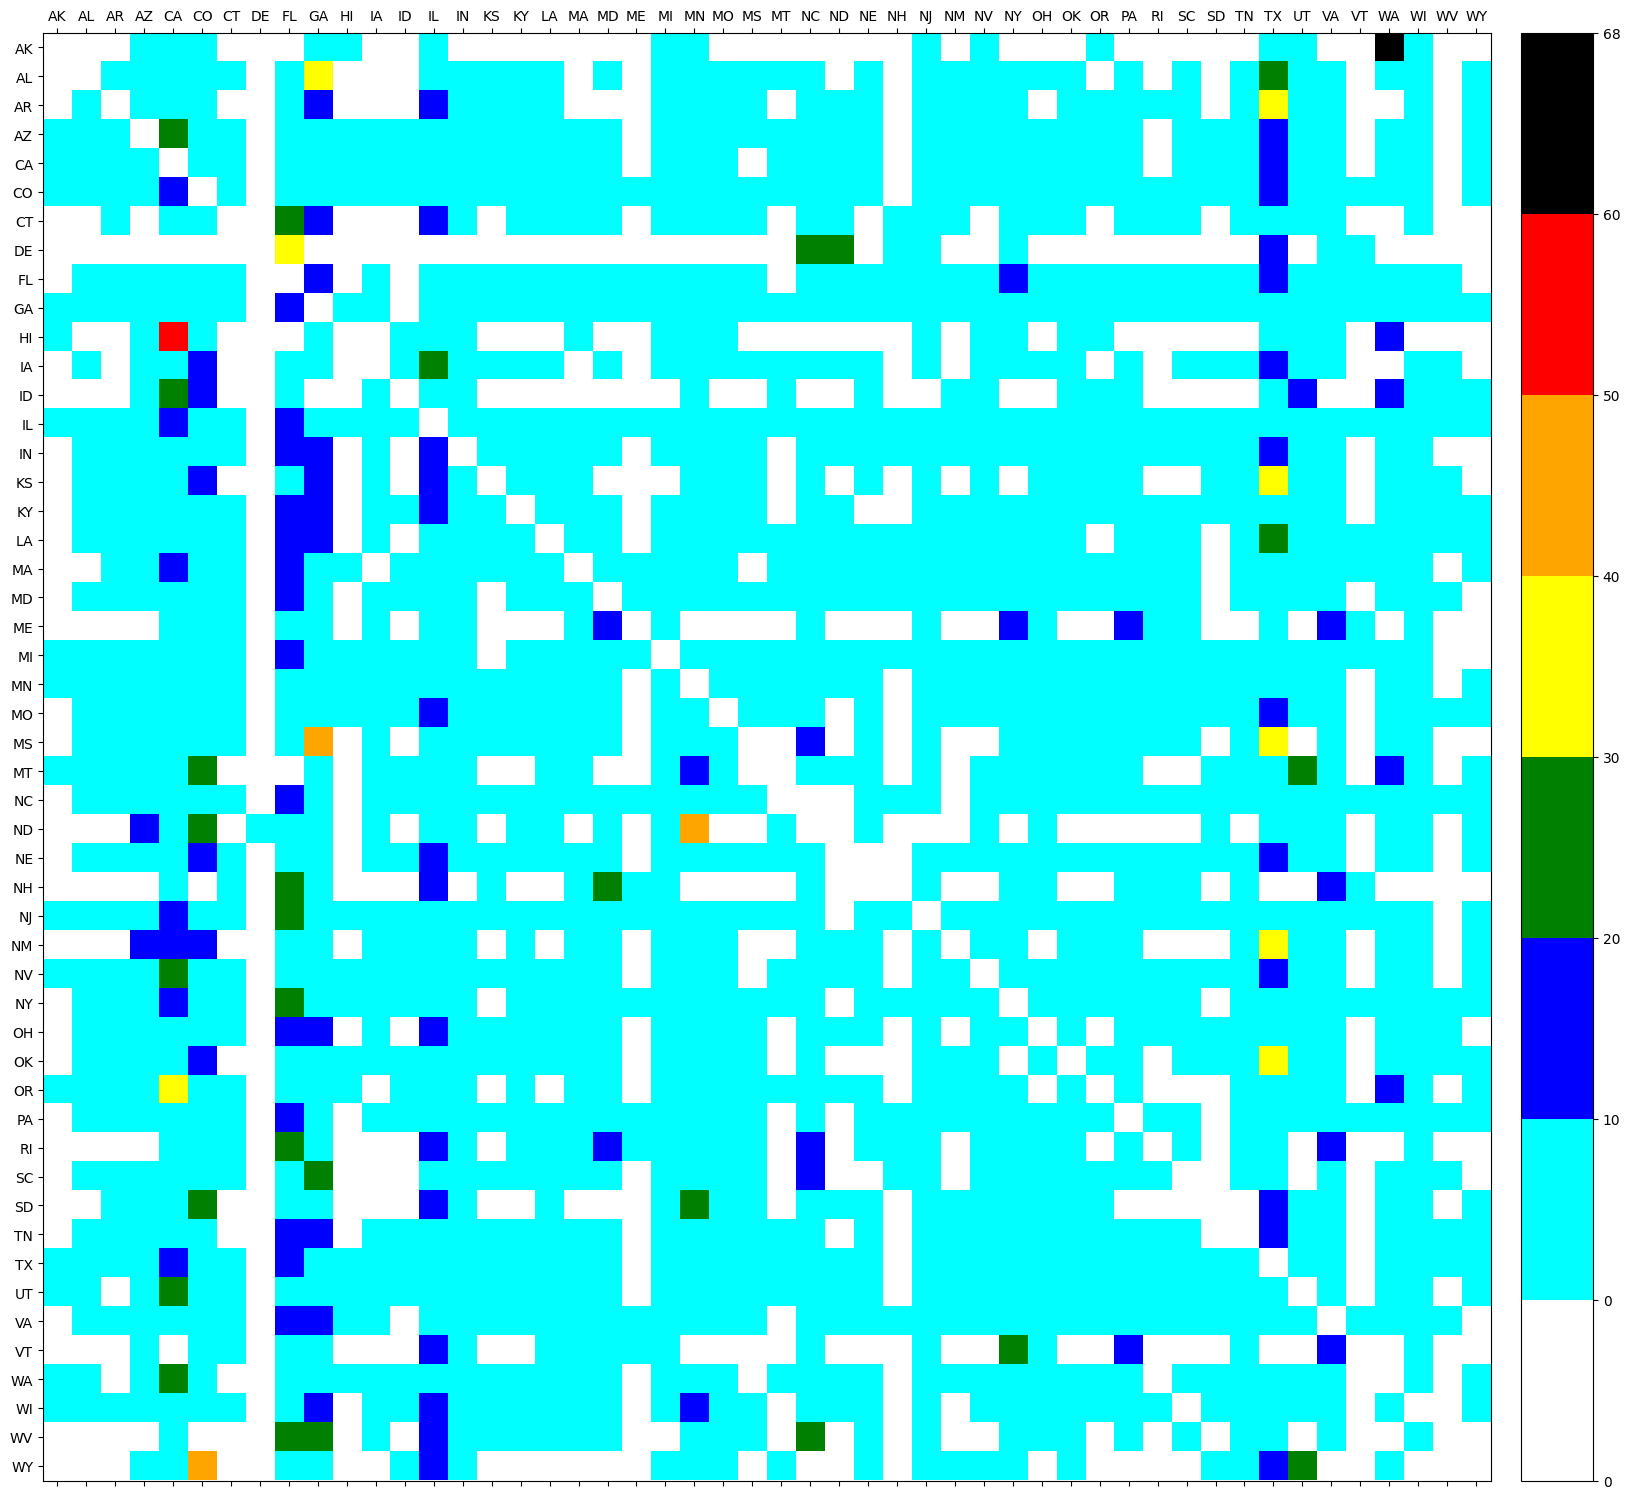

In [ ]:
discrete_matshow(transmission_pro_matrix)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
the_states_having_top_20_lowest_traffic_flow = \
np.array(short_state_name_list)[np.argsort(np.sum(adjacency_matrix_no_DC, axis=1))[:20]]
print(f'The states having top 20 lowest traffic flow:\n {the_states_having_top_20_lowest_traffic_flow}')

The states having top 20 lowest traffic flow:
 ['DE' 'WV' 'VT' 'WY' 'NH' 'SD' 'KS' 'MS' 'ND' 'ME' 'RI' 'AR' 'IA' 'AK'
 'MT' 'ID' 'NE' 'AL' 'NM' 'CT']


In [ ]:
g = ig.Graph(directed=True)
#Add ids and labels to vertices
g.add_vertices(len(short_state_name_list))
g.layout_circle()
for index, abrr in enumerate(short_state_name_list):
  g.vs[index]["id"] = index
  g.vs[index]["label"] = abrr
  if abrr in the_states_having_top_20_lowest_traffic_flow:
    g.vs[index]["color"] = 'cyan'
  else:
    g.vs[index]["color"] = 'blue'

In [ ]:
edges_connection = list()
for i in range(len(transmission_pro_matrix)):
  for j in range(len(transmission_pro_matrix)):
    if transmission_pro_matrix[i][j]==0:continue
    else:
      edges_connection.append((i,j))

In [ ]:
len(edges_connection)

1890

In [ ]:
weights = transmission_pro_matrix.flatten()[np.nonzero(transmission_pro_matrix.flatten())[0]]
weights = np.log((weights/100), dtype=np.float32)*(-1)

In [ ]:
g.add_edges(edges_connection)
g.es['weight'] = weights
#g.es['label'] = weights
#g.delete_vertices([7])

In [ ]:
visual_style = {}
visual_style["edge_arrow_size"] = [0.5]*len(weights)
visual_style["edge_arrow_width"] = [0.8]*len(weights)
visual_style["edge_curved"] = False
#my_layout = g.layout_circle
visual_style["layout"] = g.layout_circle()

In [ ]:
def find_node_with_high_scores_(network, state_name_list, network_name):
    high_score_states = list()
    vs_degree = network.vs.select(_degree=max(network.degree()))
    vs_degree = [v.index for v in vs_degree]
    #print(type(vs_degree))
    high_score_states.extend(vs_degree)
    vs_eccentric = network.vs.select(_eccentricity=min(network.eccentricity()))
    vs_eccentric = [v.index for v in vs_eccentric]
    vs_closeness = network.vs.select(_closeness=max(network.closeness()))
    vs_closeness = [v.index for v in vs_closeness]
    high_score_states.extend(vs_closeness)

    # Need to check if directed or not for these methods
    if network.is_directed():
        vs_betweenness = network.vs.select(
            _betweenness=max(network.betweenness()))
        vs_betweenness = [v.index for v in vs_betweenness]
        high_score_states.extend(vs_betweenness)
        pagerank = network.pagerank()
        vs_pagerank = network.vs[pagerank.index(max(pagerank))]
        high_score_states.append(vs_pagerank.index)

    else:
        vs_betweenness = network.vs.select(_betweenness=max(network.betweenness(directed=False)))
        vs_betweenness = [v.index for v in vs_betweenness]
        high_score_states.append(vs_betweenness)
        pagerank = network.pagerank(directed=False)
        vs_pagerank = network.vs[pagerank.index(max(pagerank))]
        high_score_states.append(vs_pagerank.index)

    # Get list of authority scores, find max index, grab label at index
    auth = network.authority_score()
    vs_authority = network.vs[auth.index(max(auth))]
    high_score_states.append(vs_authority.index)

    # Get list of hub scores, find max index, grab label at index
    hub = network.hub_score()
    vs_hub = network.vs[hub.index(max(hub))]
    high_score_states.append(vs_hub.index)

    for i in list(set(high_score_states)):
        network.vs[i]["color"] = 'red'

    print(f'{network_name}:')
    print(f'Directed graph: {network.is_directed()}')
    print(f'Maximum Degree: {state_name_list[vs_degree]};')
    print(f'Minimum Eccentricity: {state_name_list[vs_eccentric]};')
    print(f'Maximum Closeness: {state_name_list[vs_closeness]} ; Maximum betweenness: {state_name_list[vs_betweenness]} ;')
    print(f'Maximum Pagerank: {state_name_list[vs_pagerank.index]} ; Maximum Kleinberg Authority: {state_name_list[vs_authority.index]} ; Maximum Kleinberg Hub: {state_name_list[vs_hub.index]}')

In [ ]:
find_node_with_high_scores_(g, short_state_name_list, 'flight information network')

flight information network:
Directed graph: True
Maximum Degree: ['CA'];
Minimum Eccentricity: ['CA' 'NJ'];
Maximum Closeness: ['CA' 'NJ'] ; Maximum betweenness: ['NJ'] ;
Maximum Pagerank: CA ; Maximum Kleinberg Authority: IL ; Maximum Kleinberg Hub: NJ


In [ ]:
def find_node_with_lowest_scores_(network, state_name_list, network_name):
    lowest_score_states = list()
    vs_degree = network.vs.select(_degree=min(network.degree()))
    vs_degree = [v.index for v in vs_degree]
    lowest_score_states.extend(vs_degree)
    vs_eccentric = network.vs.select(_eccentricity=max(network.eccentricity()))
    vs_eccentric = [v.index for v in vs_eccentric]
    vs_closeness = network.vs.select(_closeness=min(network.closeness()))
    vs_closeness = [v.index for v in vs_closeness]
    lowest_score_states.extend(vs_closeness)

    # Need to check if directed or not for these methods
    if network.is_directed():
        vs_betweenness = network.vs.select(
            _betweenness=min(network.betweenness()))
        vs_betweenness = [v.index for v in vs_betweenness]
        lowest_score_states.extend(vs_betweenness)
        pagerank = network.pagerank()
        vs_pagerank = network.vs[pagerank.index(min(pagerank))]
        lowest_score_states.append(vs_pagerank.index)
    else:
        vs_betweenness = network.vs.select(_betweenness=min(network.betweenness(directed=False)))
        vs_betweenness = [v.index for v in vs_betweenness]
        lowest_score_states.extend(vs_betweenness)
        pagerank = network.pagerank(directed=False)
        vs_pagerank = network.vs[pagerank.index(min(pagerank))]
        lowest_score_states.append(vs_pagerank.index)

    # Get list of authority scores, find max index, grab label at index
    auth = network.authority_score()
    vs_authority = network.vs[auth.index(min(auth))]
    lowest_score_states.append(vs_authority.index)

    # Get list of hub scores, find max index, grab label at index
    hub = network.hub_score()
    vs_hub = network.vs[hub.index(min(hub))]
    lowest_score_states.append(vs_hub.index)
    for i in list(set(lowest_score_states)):
      network.vs[i]["color"] = 'yellow'

    print(f'{network_name}:')
    print(f'Directed graph: {network.is_directed()}')
    print(f'Minimum Degree: {state_name_list[vs_degree]};')
    print(f'Maximum Eccentricity: {state_name_list[vs_eccentric]};')
    print(f'Minimum Closeness: {state_name_list[vs_closeness]} ; Minimum betweenness: {state_name_list[vs_betweenness]} ;')
    print(f'Minimum Pagerank: {state_name_list[vs_pagerank.index]} ; Minimum Kleinberg Authority: {state_name_list[vs_authority.index]} ; Minimum Kleinberg Hub: {state_name_list[vs_hub.index]}')

In [ ]:
find_node_with_lowest_scores_(g, short_state_name_list, 'flight information network')

flight information network:
Directed graph: True
Minimum Degree: ['DE'];
Maximum Eccentricity: ['AK' 'AL' 'AR' 'AZ' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN'
 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND' 'NE'
 'NH' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT'
 'VA' 'VT' 'WA' 'WI' 'WV' 'WY'];
Minimum Closeness: ['DE'] ; Minimum betweenness: ['AK'] ;
Minimum Pagerank: DE ; Minimum Kleinberg Authority: DE ; Minimum Kleinberg Hub: DE


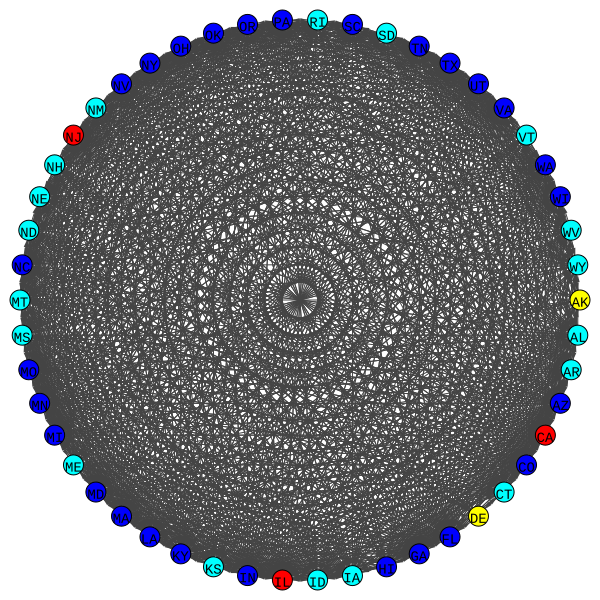

In [ ]:
ig.plot(g, **visual_style)